# US15 - Custo Mensal de Água em Cada Parque Relacionado com a Sua Dimensão

## 1. Introdução

O custo mensal de água em cada parque está diretamente relacionado com a sua dimensão. O custo da água consumida
segue as regras definidas em US09. Nesta US, iremos prever o custo médio mensal que será pago pelo consumo de água no novo parque de 55 hectares, aplicando o modelo de regressão linear, sendo a área do parque a variável independente e o custo médio mensal gasto com consumo de água como variável de resposta.$y = β + β1x$


## 2. Código e Resultados

In [1]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from scipy import stats
import math

In [2]:
# leitura do ficheiro atualizado com o consumo de água
data_updated = pd.read_csv('water_consumption_updated.csv', sep=';', skiprows = 1, names=['Park', 'Year', 'Month', 'Day', 'Consumption'])

data_updated['Month'] = data_updated['Month'].astype(int)
data_updated['Year'] = data_updated['Year'].astype(int)
data_updated['Consumption'] = data_updated['Consumption'].astype(str).str.replace(',', '.').astype(float)

# Leitura do ficheiro com as áreas dos parques
data_area = pd.read_csv('Area.csv', sep=';', skiprows = 1, names=['Park', 'Area'])

data_area['Area'] = data_area['Area'].astype(str).str.replace(',', '.').astype(float)

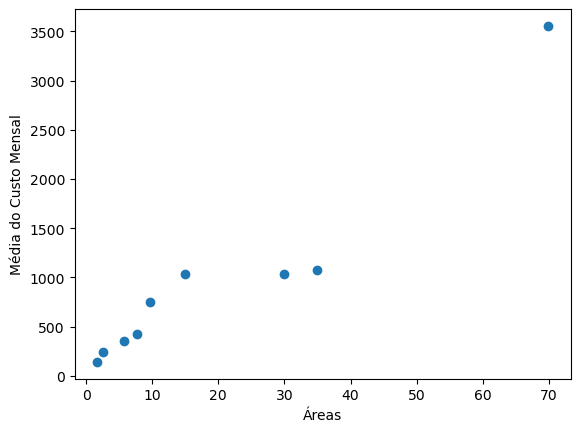


A reta de regressão é c = 72.976 + 44.829a


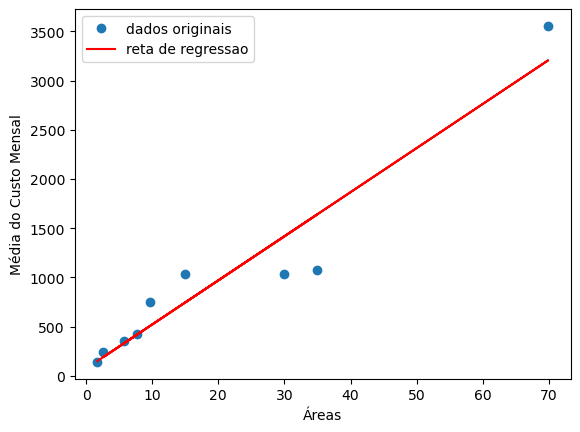

O valor previsto para o Custo Mensal do Parque com 55 hectares é de 2538.59€
O IC com 95% de confiança é [1620.45, 3456.73]


In [3]:
numero_parques = data_area.shape[0]

taxa_base = 0.7  # Taxa base por metro cúbico
limite_superior = 1000  # Limite de consumo para aplicar a taxa base

media_custo_mensal = []

for i in range(numero_parques):
    consumo_mensal = []
    custo_por_mes = []
    
    for j in range(1, 13):
        dados_filtrados = data_updated[(data_updated['Park'] == data_area.iloc[i, 0]) & (data_updated['Month'] == j)]
        consumo_total = dados_filtrados['Consumption'].sum()
        consumo_mensal.append(consumo_total)
    
    for k, valor in enumerate(consumo_mensal):
        if valor <= 1000:
            custo_por_mes.append(valor * taxa_base)
        else:
            custo_por_mes.append(valor * (taxa_base + (0.15 * taxa_base)))
    
    media_custo_mensal.append(st.mean(custo_por_mes))

areas = data_area['Area'].tolist()

plt.plot(areas, media_custo_mensal, 'o')
plt.xlabel('Áreas')
plt.ylabel('Média do Custo Mensal')
plt.show()

# Reta de Regressão
modelo = stats.linregress(areas, media_custo_mensal)
print(f'\nA reta de regressão é c = {modelo.intercept:.3f} + {modelo.slope:.3f}a')
df = pd.DataFrame({'areas': areas, 'media_custo_mensal': media_custo_mensal})
plt.plot(df.areas, df.media_custo_mensal, 'o', label='dados originais')
plt.xlabel('Áreas')
plt.ylabel('Média do Custo Mensal')
plt.plot(df.areas, modelo.intercept + modelo.slope * df.areas, 'r', label='reta de regressao')
plt.legend()
plt.show()

# Previsão do Custo Mensal para um Parque com 55 hectares de área
valor_esperado = modelo.intercept + modelo.slope * 55
print(f'O valor previsto para o Custo Mensal do Parque com 55 hectares é de {valor_esperado:.2f}€')

# Soma dos quadrados dos resíduos (SSE)
sse = np.sum((media_custo_mensal - (modelo.intercept + modelo.slope * np.array(areas))) ** 2)

# Erro padrão da previsão
se = np.sqrt(sse / (numero_parques - 2))

# Soma dos quadrados da diferença entre as áreas e a média das áreas
Sxx = np.sum((np.array(areas) - np.mean(areas)) ** 2)

# Valor crítico (t-value) para um intervalo de confiança de 95%
t_value = stats.t.ppf(0.975, numero_parques - 2)

# Erro padrão da previsão para um valor de 55 hectares
se_pred = se * np.sqrt(1 + (1 / numero_parques) + ((55 - np.mean(areas)) ** 2 / Sxx))

# Intervalo de confiança
limite_inf = valor_esperado - t_value * se_pred
limite_sup = valor_esperado + t_value * se_pred

print(f'O IC com 95% de confiança é [{limite_inf:.2f}, {limite_sup:.2f}]')


## 3. Análise e Interpretação dos Resultados

# US16 - Determinar a Melhor Linha que se Ajusta aos Dados Obtidos na US14

## Introdução

## Código e Resultados

In [33]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from scipy import stats
import math

In [34]:
# leitura do ficheiro atualizado com o consumo de água
us17_data = pd.read_csv('solution_us14.csv', sep=';', skiprows = 1, names=['size', 'time'])

us17_data['size'] = us17_data['size'].astype(int)
us17_data['time'] = us17_data['time'].astype(str).str.replace(',', '.').astype(float)

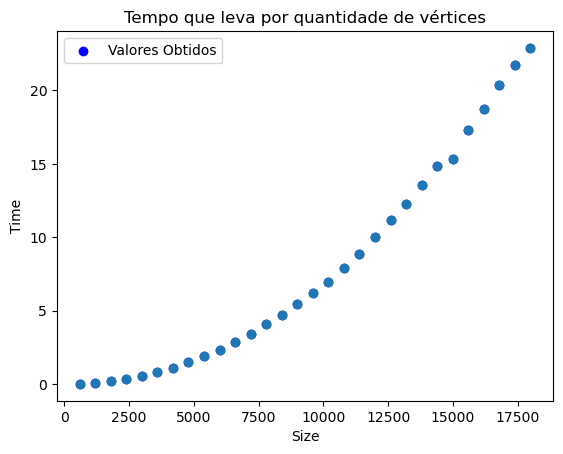

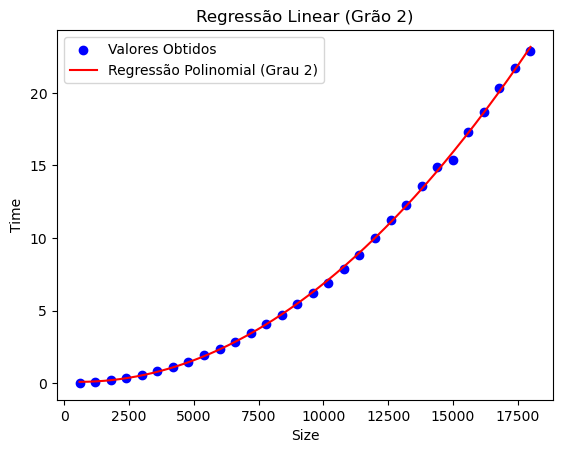

In [36]:
# Sem Reta de Regressão
size = us17_data['size'].tolist()
time = us17_data['time'].tolist()
plt.scatter(size, time, color='blue', label='Valores Obtidos')
plt.plot(size, time, 'o')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Tempo que leva por quantidade de vértices')
plt.legend()
plt.show()

# Reta de Regressão
# Função para calcular as características polinomiais
def polynomial_features(x, degree):
    X_poly = np.vander(x, degree + 1, increasing=True)
    return X_poly

# Testando diferentes graus de polinômio
degree = 2


# Calculando as características polinomiais
X_poly = polynomial_features(size, degree)

# Ajuste do modelo de regressão linear aos dados polinomiais
coefficients, residuals, rank, singular_values = np.linalg.lstsq(X_poly, time, rcond=None)

# Predição
size_range = np.linspace(np.min(size), np.max(size), 500)
X_range_poly = polynomial_features(size_range, degree)
time_pred = X_range_poly.dot(coefficients)

# Visualização
plt.scatter(size, time, color='blue', label='Valores Obtidos')
plt.plot(size_range, time_pred, color='red', label=f'Regressão Polinomial (Grau {degree})')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Regressão Linear (Grão {degree})')
plt.legend()
plt.show()

## Análise e Interpretação de Resultados

## Contribuição dos Elementos do Grupo

**Diogo Pereira** = 35%

**Diogo Veiros** = 35%

**José Alves** = 15%

**Tiago Sampaio** = 15%